In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cowerc_adsorption import _COLORS as colors

contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]

In [5]:
df = pd.read_csv("summary_results.txt")
df

,Length (cm),Contact Time (min),sm,kads1,kads2,kads3,kads4,kads5,kads6,kdes1,kdes2,kdes3,kdes4,kdes5,kdes6
0,3.00,0.625,5.99,1.67,1.24,1.20,1.17,1.31,1.60,-0.9250,-1.960,-2.41,-2.57,-2.82,-2.63
1,2.18,0.454,5.42,1.55,1.48,1.72,1.61,1.31,1.57,-0.6460,-1.490,-1.58,-1.76,-3.05,-2.67
2,1.71,0.356,5.30,2.08,1.52,1.74,1.32,1.47,1.65,0.0504,-0.966,-1.10,-1.63,-2.05,-1.93
3,1.28,0.267,3.71,1.89,1.69,1.44,1.36,1.58,1.67,0.3270,-0.403,-1.09,-1.56,-1.79,-1.88
4,0.85,0.177,2.88,1.63,1.23,1.21,1.23,1.50,1.59,0.3730,-0.762,-1.66,-1.87,-2.57,-2.84


Those are log values. Units are
- $s_m$ in $\text{nmol}/\text{cm}^3$
- $k_{ads}$ in $\text{1/min}$
- $k_{des}$ in $\text{1/min}$

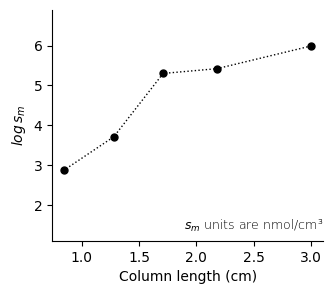

In [63]:
fig, ax = plt.subplots(figsize=(3.5, 3))
ax.plot(df["Length (cm)"], df["sm"], marker="o", c="k", ms=5, lw=1, ls="dotted")
ax.set_xlabel("Column length (cm)")
ax.set_ylabel(R"$log\,{s_m}$")
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylim(1.1, 6.9)
ax.text(1, 0.05, "$s_m$ units are nmol/cm³", transform=ax.transAxes, fontsize=9, ha="right", fontweight="100")
plt.show()

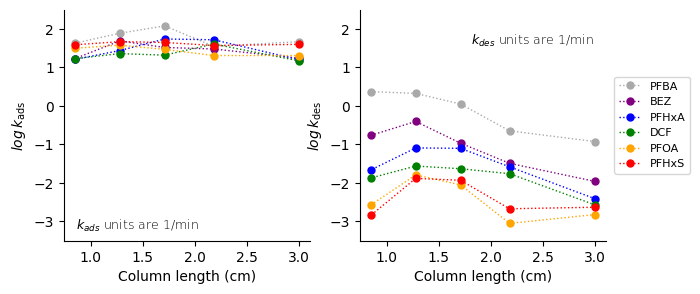

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex=True)

for ax, param in zip(axs, ["kads", "kdes"]):
    for i, (cont, color) in enumerate(zip(contaminants, colors), start=1):
        ax.plot(df["Length (cm)"], df[f"{param}{i}"], marker="o", c=color, ms=5, lw=1, ls="dotted", label=cont)

    ax.set_xlabel("Column length (cm)")
    ax.set_ylabel(Rf"$log\,{{k_\text{{{param[1:]}}}}}$")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_ylim(-3.5, 2.5)

axs[0].text(
    0.05, 0.05, "$k_{ads}$ units are 1/min", transform=axs[0].transAxes, fontsize=9, ha="left", fontweight="100"
)
axs[1].text(
    0.95, 0.85, "$k_{des}$ units are 1/min", transform=axs[1].transAxes, fontsize=9, ha="right", fontweight="100"
)

ax.legend(loc="center left", bbox_to_anchor=(1.01, 0.5), fontsize=8)
plt.show()